In [ ]:
import random
import datetime
from IPython.display import Image

class Car:
  def __init__(self, numberPlate = 0, img = "kennzeichen.png"):
    if numberPlate == 0:
      letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
      numbers = "0123456789"
      self.numberPlate = random.choice(letters) + random.choice(letters) + random.choice(letters) + "-" + random.choice(numbers)+ random.choice(numbers)+ random.choice(numbers)+ random.choice(numbers)
    else:
      self.numberPlate = numberPlate
    self.time = datetime.datetime.now()
    self.img = img

  def leaveGarage(self, garage):
    duration = datetime.datetime.now() - self.time
    costs = 1.1 + (duration.seconds/60) * 0.04
    f = open("Rechnung-" + self.numberPlate + ".txt", "w")
    f.write("Rechnung von " + garage.name + " für das Fahrzeug mit den Kennzeichen " + self.numberPlate + "\n")
    f.write("Zeit: " + str(duration) + "\n")
    f.write("Kosten: " + str(round(costs,2)) + "€")
    f.close()

class Garage:
  def __init__(self, name, totalParking):
    self.name = str(name)
    self.totalParking = int(totalParking)
    self.freeParking = int(totalParking)
    self.cars = []
  
  def percentageFreeParking(self):
    return int(self.freeParking/self.totalParking * 100)

  def info(self):
    print(str(self.freeParking) + " freie Parkplätze (" + str(self.percentageFreeParking()) + "%) ... "  + str(self.name))

  def changeCars(self, difference, electric = False):
    if self.freeParking - difference <= self.totalParking and self.freeParking - difference >= 0:
      self.freeParking -= difference
      if difference > 0:
        i = 0
        while i < difference:
          temp = Car()
          display(Image(temp.img))
          self.cars.append(temp)
          i += 1
      elif difference < 0:
        i = 0
        while i < abs(difference):
          display(Image(self.cars[0].img))
          self.cars[0].leaveGarage(self)
          self.cars.pop(0)
          i += 1
    elif self.freeParking - difference < 0:
      print("Parkplatz ist voll! " + str(abs(self.freeParking - difference)) + " Auto(s) konnten nicht einparken.")
      i = 0
      while i < self.freeParking:
        self.cars.append(Car())
        i += 1
      self.freeParking = 0
    else:
      print("Fehler: Mehr Autos wollten rausfahren als eingeparkt sind.")

#abgeleitet von Garage
class EGarage(Garage):
  def __init__(self, name, totalParking, eTotalParking):
    Garage.__init__(self, name, totalParking)
    self.eTotalParking = eTotalParking
    self.eFreeParking = eTotalParking
    self.eCars = []

  def info(self):
    print(str(self.freeParking) + " freie Parkplätze (" + str(self.percentageFreeParking()) + "%) und " + str(self.eFreeParking) + " freie E-Parkplätze ... "  + str(self.name))

  def changeCars(self, difference, electric = False):
    if electric == False:
      Garage.changeCars(self, difference)
    else:
      if self.eFreeParking - difference <= self.eTotalParking and self.eFreeParking - difference >= 0:
        self.eFreeParking -= difference
        if difference > 0:
          i = 0
          while i < difference:
            temp = Car()
            display(Image(temp.img))
            self.eCars.append(temp)
            i += 1
        elif difference < 0:
          i = 0
          while i < abs(difference):
            display(Image(self.eCars[0].img))
            self.eCars[0].leaveGarage(self)
            self.eCars.pop(0)
            i += 1
      elif self.eFreeParking - difference < 0:
        print("Parkplatz ist voll! " + str(abs(self.eFreeParking - difference)) + " Auto(s) konnten nicht einparken.")
        i = 0
        while i < self.freeParking:
          self.eCars.append(Car())
          i += 1
        self.eFreeParking = 0
      else:
       print("Fehler: Mehr Autos wollten rausfahren als eingeparkt sind.")

#Verwaltung von Garagen
class ParkGuidance:
  def __init__(self):
    self.garages = []

  def addGarage(self, garage):
    if type(garage) is Garage or type(garage) is EGarage:
      self.garages.append(garage)
    else:
      print("Nur Garagen können hinzugefügt werden.")

  def removeGarage(self, garage):
    if garage in self.garages:
      self.garages.remove(garage)
    else:
      print("Garage wurde nicht gefunden.")

  def sortGarages(self):
    result = self.garages.copy()
    isSorted = False
    while isSorted == False:
      isSorted = True
      i = 0
      while i < len(self.garages)-1:
        if result[i].freeParking < result[i+1].freeParking:
          temp = result[i]
          result[i] = result[i+1]
          result[i+1] = temp
          isSorted = False
        i += 1
    return result

#Daten aus einer Textdatei herauslesen
class GarageFileReader:
  def __init__(self, parkGuidance):
    f = open("garages.txt")
    data = f.readlines()
    for x in data:
      dataSplit = x.split("/")
      if len(dataSplit) == 2:
        parkGuidance.addGarage(Garage(dataSplit[0], int(dataSplit[1])))
      elif len(dataSplit) == 3:
        parkGuidance.addGarage(EGarage(dataSplit[0], int(dataSplit[1]), int(dataSplit[2])))
    f.close()

  @staticmethod
  def writeData(parkGuidance):
    f = open("garages.txt", "w")
    f.write(parkGuidance.garages[0].name + "/" + str(parkGuidance.garages[0].totalParking) + "\n")
    f.close()
    f = open("garages.txt", "a")
    i = 1
    while i < len(parkGuidance.garages):
      if type(parkGuidance.garages[i]) is EGarage:
        f.write(parkGuidance.garages[i].name + "/" + str(parkGuidance.garages[i].totalParking) + "/" + str(parkGuidance.garages[i].eTotalParking) + "\n")
      else:
        f.write(parkGuidance.garages[i].name + "/" + str(parkGuidance.garages[i].totalParking) + "\n")
      i += 1
    f.close()

#Das Programm läuft ab hier
parkGuidance = ParkGuidance()
GarageFileReader(parkGuidance)
while True:
  print("")
  userinput = int(input("""Wählen sie eines aus:
  0 - Ablauf (Zufällige Autos, alle Garagen)
  1 - Garage hinzufügen
  2 - Garage entfernen
  3 - Bestimmtes Auto rausfahren lassen
  4 - Daten abspeichern
  5 - Beenden
  """))

  if userinput == 0:
    i = 0
    while i < len(parkGuidance.garages):
      carsLeft = int(input("Bitte geben sie die ausgefahrene Fahrzeuge in Garage " + parkGuidance.garages[i].name + " ein "))
      carsJoined = int(input("Bitte geben sie die eingefahrene Fahrzeuge in Garage " + parkGuidance.garages[i].name + " ein "))
      if type(parkGuidance.garages[i]) is EGarage:
        eCarsLeft = int(input("Bitte geben sie die ausgefahrene Fahrzeuge in E-Garage " + parkGuidance.garages[i].name + " ein "))
        eCarsJoined = int(input("Bitte geben sie die eingefahrene Fahrzeuge in E-Garage " + parkGuidance.garages[i].name + " ein "))
        parkGuidance.garages[i].changeCars(eCarsJoined, True)
        parkGuidance.garages[i].changeCars(-eCarsLeft, True)
      parkGuidance.garages[i].changeCars(carsJoined)
      parkGuidance.garages[i].changeCars(-carsLeft)
      i += 1
      print("")

  elif userinput == 1:
    name = str(input("Bitte geben sie den Namen der Garage ein: "))
    parking = int(input("Bitte geben sie die Anzahl der Parkplätze ein: "))
    electric = int(input("Hat diese Garage E-Partkplätze? 0 für Nein, 1 für Ja: "))
    if electric == 1:
      eParking = int(input("Bitte geben sie die Anzahl der E-Parkplätze ein: "))
      parkGuidance.addGarage(EGarage(name, parking, electric))
    else:
      parkGuidance.addGarage(Garage(name, parking))
    print("")

  if userinput == 2:
    name = str(input("Bitte geben sie den Namen der Garage ein:"))
    for garage in parkGuidance.garages:
      if garage.name == name:
        parkGuidance.removeGarage(garage)
        break
    print("")

  if userinput == 3:
    name = input("In welcher Garage steht das Auto? ")
    for garage in parkGuidance.garages:
      if garage.name == name:
        print("Folgende Autos stehen in dieser Garage:")
        for car in garage.cars:
          print(car.numberPlate)
        numberPlate = input("Welches Auto wollen sie rausfahren lassen? ")
        i = 0
        for car in garage.cars:
          if car.numberPlate == numberPlate:
            car.leaveGarage(garage)
            garage.cars.pop(i)
            garage.freeParking += 1
            display(Image(car.img))
            print("Rechnung verschickt. \n")
            break
          i += 1
        break

  if userinput == 4:
    GarageFileReader.writeData(parkGuidance)
    print("Daten erfolgreich abgespeichert.")

  if userinput == 5:
    print("Programm ist beendet")
    break;    
  sortedGarages = parkGuidance.sortGarages()
  i = 0
  while i < len(sortedGarages):
    sortedGarages[i].info()
    i += 1

FileNotFoundError: ignored

In [ ]:
#------Trenung zwischen Hauptprogramm und Kennzeichenerkennung

Bitte geben sie den Namen der Datei (mit extension!) ein: image4.jpeg


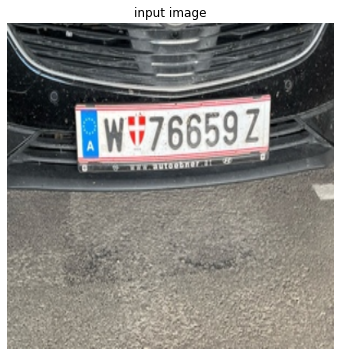

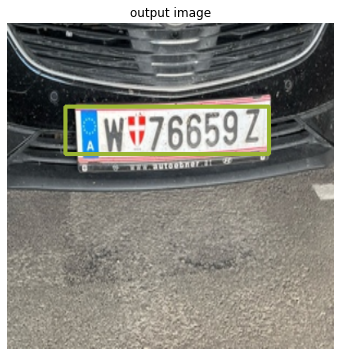

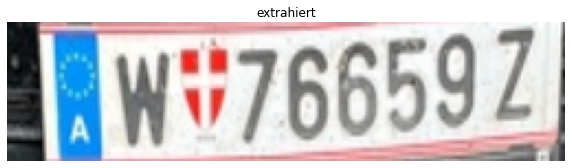

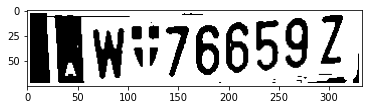

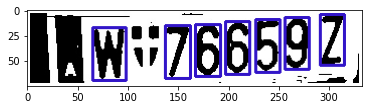

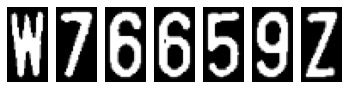

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

#dataset für erkennung von Kennzeichen
plate_cascade = cv2.CascadeClassifier('indian_license_plate.xml')

#Kennzeichen finden
def detect_plate(img, text=''): 
    plate_img = img.copy()
    roi = img.copy()
    plate = 0
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) #Koordinaten wo das Kennzeichen gefunden wurde
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] #"extracting the Region of Interest of license plate for blurring."
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (51,181,155), 3) #Markieren des Kennzeichens (in Gelb)
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2), 
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)
        
    return plate_img, plate #verarbeites Bild mit markierten Kennzeichen und ausgeschnitten

#Bild mit Titel anzeigen (nur wenn eigentlich etwas erkennt wird?)
def display(img_, title=''):
  try:
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
  except:
    print("kein Bild")

img = ""
loop = True
while loop:
  try:
    imgName = input("Bitte geben sie den Namen der Datei (mit extension!) ein: ")
    img = cv2.imread(imgName)
    img = cv2.resize(img, (400,400))
    loop = False
  except:
    print("Datei nicht gefunden")
    pass 
#img = cv2.imread('image4.jpeg')
#img = cv2.resize(img, (400,400)) #bei größere Bilder wird es nicht erkannt, wir nehmen an, dass es eher einen 4:3 Bildverhältniss hat
display(img, 'input image')
output_img, plate = detect_plate(img)
display(output_img, 'output image')
display(plate, 'extrahiert')

# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

char = segment_characters(plate)

for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [3]:
#Model (data unzippen!!)
import tensorflow.keras.backend as K

train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = 'data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

# Metrics for checking the model performance while training
def f1score(y, y_pred):
  return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro') 

def custom_f1score(y, y_pred):
  return tf.py_function(f1score, (y, y_pred), tf.double)

K.clear_session()
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=[custom_f1score])
model.summary()

class stop_training_callback(tf.keras.callbacks.Callback): #kein overfitten?
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_custom_f1score') > 0.999):
      self.model.stop_training = True


Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        23248     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        131104    
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        131136    
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7,

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
!unzip data.zip

In [4]:
#training
batch_size = 1
callbacks = [stop_training_callback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      epochs = 40, verbose=1, callbacks=callbacks)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


864/864 [==============================] - 17s 7ms/step - loss: 3.1989 - custom_f1score: 0.1389 - val_loss: 2.2188 - val_custom_f1score: 0.3854
Epoch 2/40
864/864 [==============================] - 6s 6ms/step - loss: 1.4691 - custom_f1score: 0.5417 - val_loss: 0.7935 - val_custom_f1score: 0.7887
Epoch 3/40
864/864 [==============================] - 6s 7ms/step - loss: 0.7314 - custom_f1score: 0.7766 - val_loss: 0.6919 - val_custom_f1score: 0.7857
Epoch 4/40
864/864 [==============================] - 6s 7ms/step - loss: 0.4241 - custom_f1score: 0.8657 - val_loss: 0.3605 - val_custom_f1score: 0.8988
Epoch 5/40
864/864 [==============================] - 6s 7ms/step - loss: 0.3682 - custom_f1score: 0.8843 - val_loss: 0.2852 - val_custom_f1score: 0.9137
Epoch 6/40
864/864 [==============================] - 6s 7ms/step - loss: 0.2001 - custom_f1score: 0.9433 - val_loss: 0.2791 - val_custom_f1score: 0.9167
Epoch 7/40
864/864 [==============================] - 6s 7ms/step - loss: 0.2132 - cus

W76659Z


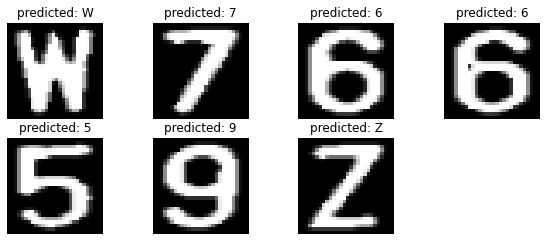

In [5]:
#Prediction (Model anwenden)
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        #y_ = model.predict_classes(img)[0] #predicting the class, seit Tensorflow 2.6 anders (siehe untere 2 Zeilen)
        y_ = model.predict(img) 
        y_ = np.argmax(y_,axis=1)[0]
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())

# Segmented characters and their predicted value.
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()